In [1]:
# 기본 라이브러리 import 
import pandas as pd
import numpy as np

# 시각화 라이브러리 import 
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화 라이브러리 import 
from sklearn.preprocessing import StandardScaler

# k 값 참고: scree plot을 통한 k 값 확인을 위한 라이브러리 import 
from yellowbrick.cluster import KElbowVisualizer
# k 값 참고: distance map 라이브러리 import 
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
# k 값 참고: 실루엣 계수 확인을 위한 라이브러리 import 
from sklearn.metrics import silhouette_score


# 데이터셋 주성분 분석중 하나인 pca 를 수행하기 위한 라이브러리 import 
from sklearn.decomposition import PCA

# k-means 알고리즘 활용을 위한 라이브러리 import 
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 데이터셋 로드
base_df = pd.read_csv('merge_df.csv')

In [3]:
# 결측치 확인
base_df.isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [4]:
base_df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/25/2017 10:35,6/5/2017 0:00,...,21.88,1,credit_card,2,146.87,toys,8683,54,64,31
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/28/2017 0:09,12/19/2017 0:00,...,24.90,1,credit_card,1,275.79,toys,8683,54,64,31
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/28/2017 0:09,12/19/2017 0:00,...,24.90,1,credit_card,1,275.79,toys,8683,54,64,31
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/26/2017 9:54,6/12/2017 0:00,...,15.62,1,credit_card,7,140.61,toys,8683,54,64,31
4,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/28/2018 21:09,3/22/2018 0:00,...,30.59,1,credit_card,10,137.58,toys,8683,54,64,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124330,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,3/27/2017 23:04,3/27/2017 23:23,3/30/2017 17:06,4/13/2017 0:00,...,10.96,1,credit_card,1,30.95,toys,300,16,16,16
124331,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,12/7/2017 23:55,12/9/2017 23:50,1/5/2018 17:59,1/22/2018 0:00,...,54.11,1,credit_card,4,304.11,toys,2400,33,10,16
124332,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,4/4/2018 17:50,4/4/2018 18:08,4/6/2018 23:32,4/18/2018 0:00,...,7.46,1,credit_card,3,92.36,toys,300,16,16,11
124333,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,11/14/2017 12:04,11/14/2017 12:15,12/19/2017 19:37,12/12/2017 0:00,...,31.93,1,credit_card,5,167.79,electronics,6185,63,11,20


In [5]:
# 클러스터링 할 컬럼 지정
feature_names=['customer_zip_code_prefix','price','shipping_charges','payment_sequential','payment_value']

# 지정된 컬럼으로 새로운 dataframe 생성 
base_df1 = pd.DataFrame(base_df, columns=feature_names)

In [6]:
base_df1

,customer_zip_code_prefix,price,shipping_charges,payment_sequential,payment_value
0,14409,124.99,21.88,1,146.87
1,68030,112.99,24.90,1,275.79
2,68030,112.99,24.90,1,275.79
3,92480,124.99,15.62,1,140.61
4,25931,106.99,30.59,1,137.58
...,...,...,...,...,...
124330,4313,19.99,10.96,1,30.95
124331,68660,250.00,54.11,1,304.11
124332,5734,84.90,7.46,1,92.36
124333,37610,167.99,31.93,1,167.79


In [7]:
# 표준화
# 표준화 방식: standard scaler (평균0, 분산1)
scale_df = StandardScaler().fit_transform(base_df1)

In [8]:
scale_df

array([[-0.68749787,  0.03603339,  0.12720383, -0.13187908, -0.09465826],
       [ 1.10853767, -0.03063849,  0.32126056, -0.13187908,  0.39578803],
       [ 1.10853767, -0.03063849,  0.32126056, -0.13187908,  0.39578803],
       ...,
       [-0.97806701, -0.18670624, -0.79938495, -0.13187908, -0.30202894],
       [ 0.08961969,  0.27494094,  0.77298865, -0.13187908, -0.01507297],
       [ 0.08961969,  0.27494094,  0.77298865,  1.24661486, -0.53116003]])

In [9]:
scale_df = pd.DataFrame(data = scale_df, columns = ['customer_zip_code_prefix','price','shipping_charges','payment_sequential','payment_value'])  
scale_df

,customer_zip_code_prefix,price,shipping_charges,payment_sequential,payment_value
0,-0.687498,0.036033,0.127204,-0.131879,-0.094658
1,1.108538,-0.030638,0.321261,-0.131879,0.395788
2,1.108538,-0.030638,0.321261,-0.131879,0.395788
3,1.927490,0.036033,-0.275046,-0.131879,-0.118473
4,-0.301568,-0.063974,0.686884,-0.131879,-0.130000
...,...,...,...,...,...
124330,-1.025663,-0.547346,-0.574485,-0.131879,-0.535649
124331,1.129640,0.730588,2.198213,-0.131879,0.503525
124332,-0.978067,-0.186706,-0.799385,-0.131879,-0.302029
124333,0.089620,0.274941,0.772989,-0.131879,-0.015073


In [10]:
# pca임의 시행 
pca = PCA(n_components=3)
pca.fit(scale_df)
# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.8233997183348615

In [11]:
# pca 시행
pca_df = pca.fit_transform(scale_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])  

# Show the first 5 firms
pca_df.head()

,PC1,PC2,PC3
0,-0.080155,0.522990,-0.212266
1,0.560893,-1.006799,0.080830
2,0.560893,-1.006799,0.080830
3,0.136486,-1.658824,0.167309
4,0.170358,0.003202,-0.036802


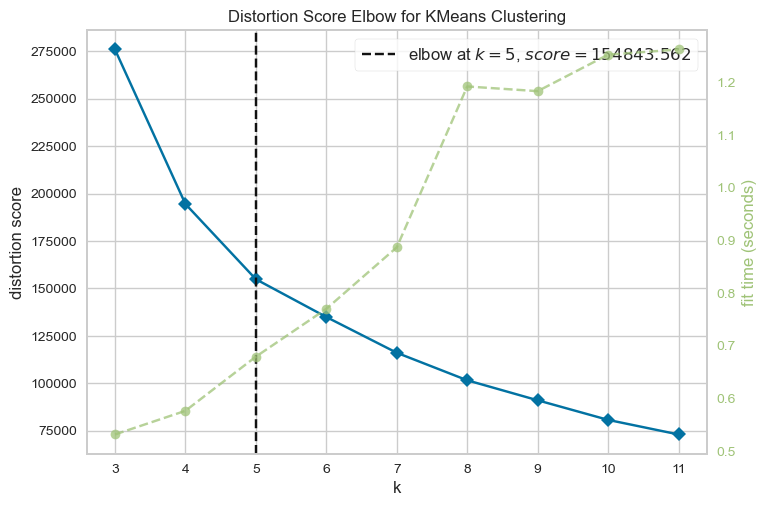

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans()

# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(3,12))

# 데이터 적용 
visualizer.fit(pca_df) 
visualizer.show()   

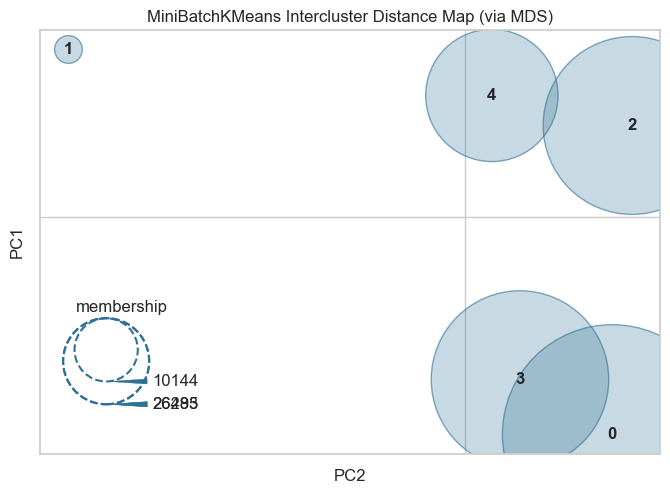

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=42))

In [13]:
# 초기 k 값 참고를 위한 distance map 시각화
#그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(5, random_state=42), pca_df)

In [14]:
#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=5, random_state=42, init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기 
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)
base_df = pd.concat([base_df, pd.DataFrame({'Cluster':labels})],axis = 1)
scale_df = pd.concat([scale_df, pd.DataFrame({'Cluster':labels})],axis = 1)

In [15]:
# 클러스터 번호가 할당된 데이터셋 생성
base_df.groupby(['Cluster'])['customer_id'].count().reset_index()

,Cluster,customer_id
0,0,766
1,1,33288
2,2,924
3,3,8446
4,4,80911


Text(30, 10, 'Text Box Text Box')

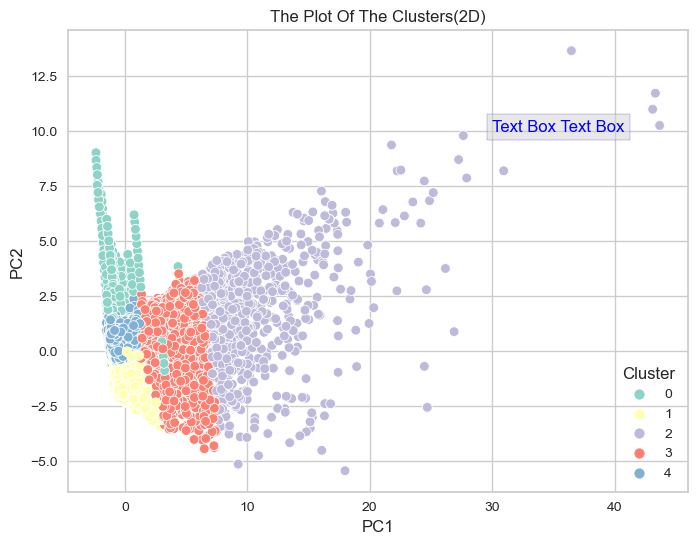

In [16]:
# 2차원으로 시각화
# 텍스트 박스 추가
text = "Text Box Text Box"
plt.figure(figsize=(8,6))
sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster',palette = 'Set3')
plt.title('The Plot Of The Clusters(2D)')
plt.text(
    x=30, y=10, s=text,  # 텍스트 위치 (x, y)와 내용
    fontsize=12, color="blue",
    bbox=dict(facecolor="lightgrey", alpha=0.5, edgecolor="blue")  # 텍스트 박스 스타일
)

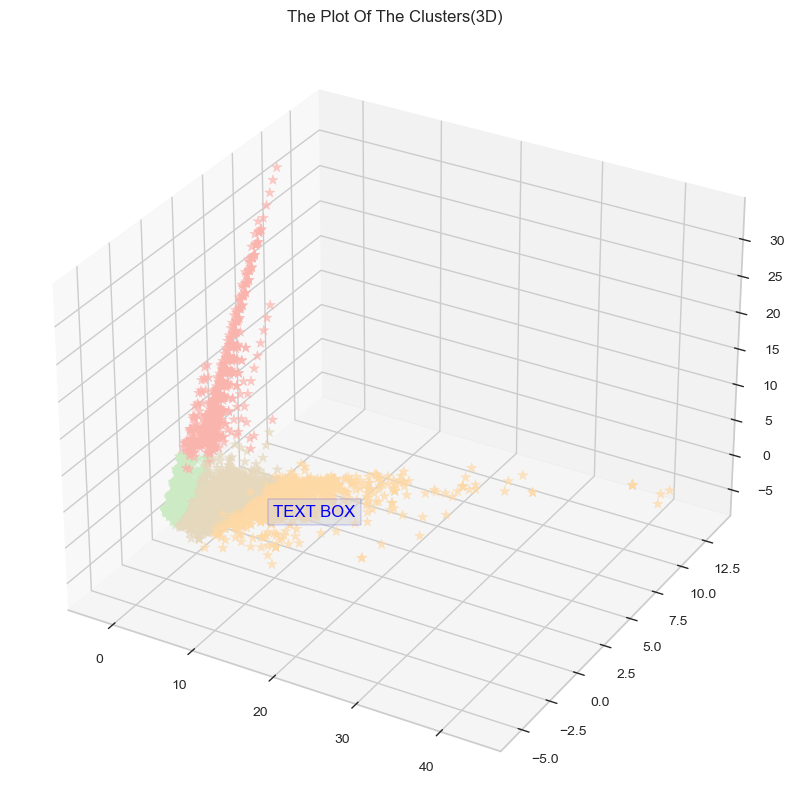

In [17]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=60, c=kmeans_df["Cluster"], marker='*', alpha = 0.7, cmap = 'Pastel1')
ax.set_title("The Plot Of The Clusters(3D)")

# 텍스트 박스 추가 (3D 플롯에서는 ax.text 사용)
text = "TEXT BOX"
ax.text(
    x=10, y=0, z=0,  # 텍스트 위치 (x, y, z)
    s=text,          # 텍스트 내용
    fontsize=12, color="blue", 
    bbox=dict(facecolor="lightgrey", alpha=0.5, edgecolor="blue")  # 텍스트 박스 스타일
)

plt.show()

In [18]:
base_df1.dtypes

customer_zip_code_prefix      int64
price                       float64
shipping_charges            float64
payment_sequential            int64
payment_value               float64
dtype: object

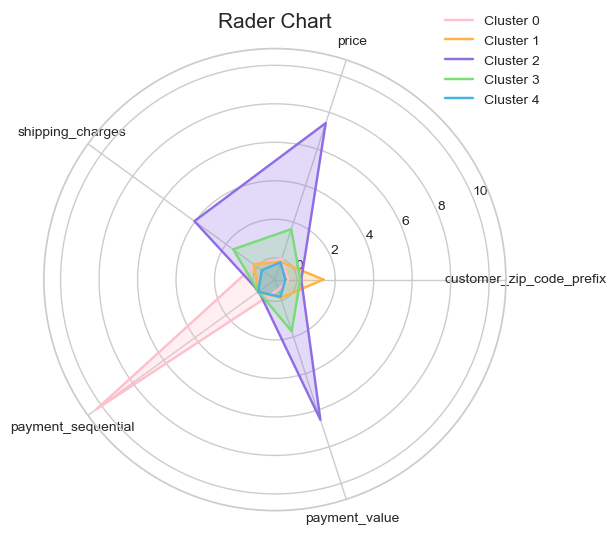

In [19]:
# 'Cluster' 컬럼 기준으로 평균값 계산
clustered = scale_df.groupby('Cluster').mean()

# 레이더 차트를 그릴 feature들 선택 (Cluster 제외)
categories = list(clustered.columns)
# 피쳐 개수
num_vars = len(categories)

# 각 축의 각도 계산
# 레이더차트는 원을 기준으로 여러개의 축을 바깥쪽으로 뻗어낸 그래프 형태입니다. 
# 각 피쳐(컬럼)은,  360도인 원 안의 한 점에 대응되어야 합니다. 
# 0, 2 * np.pi >> 처음과 끝 각도 지정
# num_vars >> 피쳐(컬럼) 개수
# endpoint=False >> 끝값(360도 지점)은 포함하지 않음 (처음 값과 중복을 피하기 위해-대응점은 한 곳 이여야함)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() # 각 변수에 대한 각도계산
angles += angles[:1]  # 닫힌 도형을 만들기 위해 처음 값 추가

# 파스텔 컬러 리스트(이곳에 hex code를 입력하세요)
# hex code 추출사이트: https://www.color-hex.com/
pastel_colors = [
    '#FFC0CB',  
    '#FFB347', 
    '#8f6ee4',  
    '#77DD77',  
    '#45b3e0',  
    '#FDFD96', 
]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 각 Cluster에 대해 그리기
for i, (idx, row) in enumerate(clustered.iterrows()):
    values = row.tolist() # 평균값 리스트로 변환
    values += values[:1] # 도형 닫기 위해 첫 값 추가
    color = pastel_colors[i % len(pastel_colors)] # 파스텔 색상 순환 사용
    ax.plot(angles, values, label=f'Cluster {idx}', color=color)# 선 그리기
    ax.fill(angles, values, alpha=0.25, color=color) # 채우기

# 카테고리 라벨 추가
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Rader Chart", size=15)
plt.show()